# 1.  Load Library and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [2]:
transaction = pd.read_csv("QVI_data.csv")
transaction.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
transaction["YEAR_MONTH"] = pd.to_datetime(transaction['DATE']).dt.to_period('M')
transaction.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11


Text(0.5, 1.0, 'Monthly Total Salse by store ID')

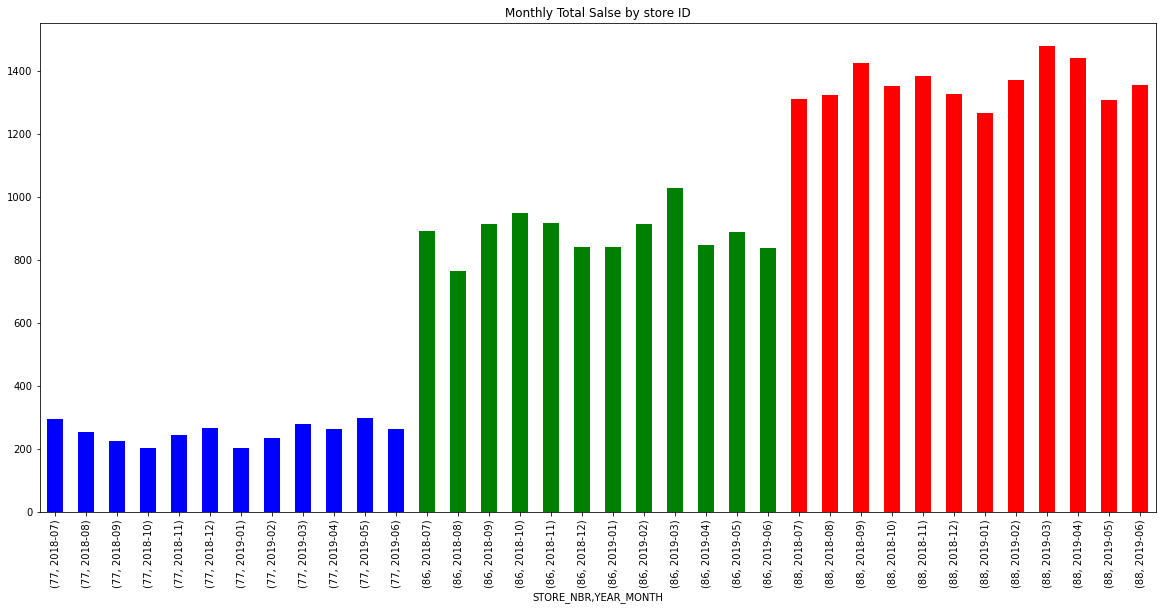

In [4]:
stores = transaction[transaction['STORE_NBR'].isin([77,86,88])].groupby(['STORE_NBR', 'YEAR_MONTH'])['TOT_SALES'].sum()
colors = []
for store, month in stores.index:
    if store == 77:
        colors.append('blue')
    elif store == 86:
        colors.append('green')
    else:
        colors.append('red')
stores.plot(kind='bar', color = colors, figsize = (20,9))
plt.title("Monthly Total Salse by store ID")

Text(0.5, 1.0, 'Monthly Total Customers by store ID')

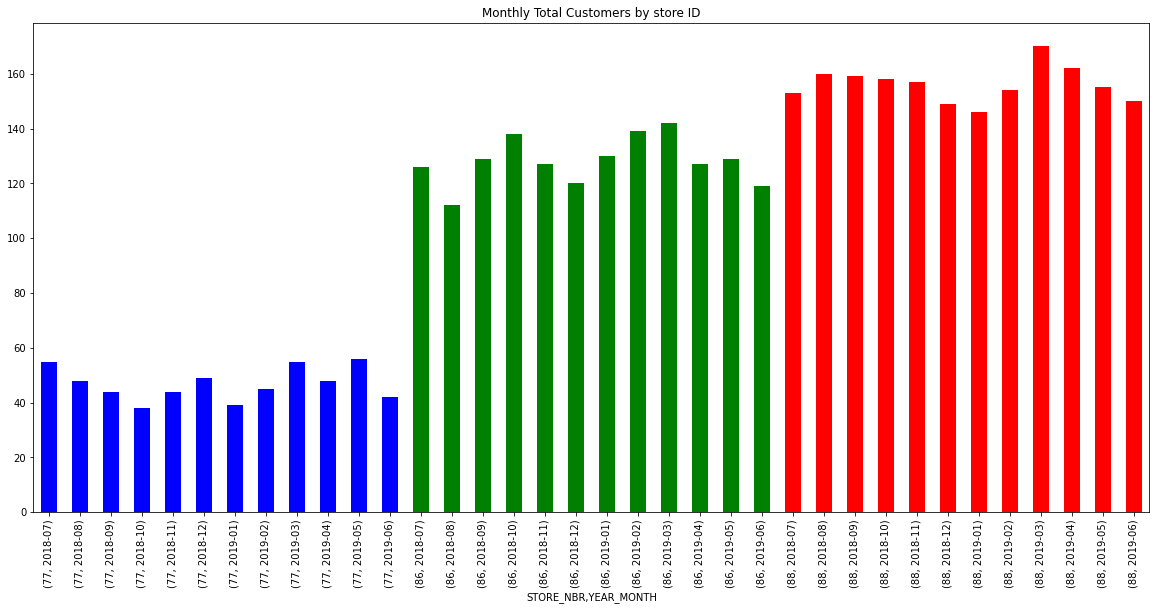

In [5]:
customers = transaction[transaction['STORE_NBR'].isin([77,86,88])].groupby(['STORE_NBR', 'YEAR_MONTH'])['LYLTY_CARD_NBR'].count()
colors = []
for store, month in customers.index:
    if store == 77:
        colors.append('blue')
    elif store == 86:
        colors.append('green')
    else:
        colors.append('red')
customers.plot(kind='bar', color = colors, figsize = (20,9))
plt.title("Monthly Total Customers by store ID")

Create a new dataframe for each store montly metrics below:
- Total Sales
- Number of Customer
- Average transaction per customer
- Average chips per customer
- Average price per unit (每包薯片的单价)

In [6]:
store_measures =transaction
store_measures['MONTHLY_SALES'] = transaction.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].transform('sum')
store_measures['MONTHLY_CUST'] = transaction.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].transform('nunique')
avg_trans = transaction.groupby(['STORE_NBR']).apply(lambda subdf:(subdf['TXN_ID'].nunique()/subdf['MONTHLY_CUST'].nunique()))
avg_chips = transaction.groupby(['STORE_NBR']).apply(lambda subdf:(subdf['PROD_QTY'].sum()/subdf['TXN_ID'].nunique()))
store_measures['MONTHLY_TRANS_PER_CUST'] = store_measures['STORE_NBR'].map(avg_trans)
store_measures['MONTHLY_CHIPS_PER_TRANS'] = store_measures['STORE_NBR'].map(avg_chips)
avg_unit = transaction.groupby(['STORE_NBR']).apply(lambda subdf:(subdf['TOT_SALES'].sum()/subdf['PROD_QTY'].sum()))
store_measures['AVG_PRICE_PER_UNIT'] = store_measures['STORE_NBR'].map(avg_unit)
store_measures.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH,MONTHLY_SALES,MONTHLY_CUST,MONTHLY_TRANS_PER_CUST,MONTHLY_CHIPS_PER_TRANS,AVG_PRICE_PER_UNIT
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10,188.1,44,71.5,1.230769,3.4
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09,278.8,59,71.5,1.230769,3.4
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03,192.9,45,71.5,1.230769,3.4
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03,192.9,45,71.5,1.230769,3.4
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11,192.6,46,71.5,1.230769,3.4


In [7]:
store_measures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype    
---  ------                   --------------   -----    
 0   LYLTY_CARD_NBR           264834 non-null  int64    
 1   DATE                     264834 non-null  object   
 2   STORE_NBR                264834 non-null  int64    
 3   TXN_ID                   264834 non-null  int64    
 4   PROD_NBR                 264834 non-null  int64    
 5   PROD_NAME                264834 non-null  object   
 6   PROD_QTY                 264834 non-null  int64    
 7   TOT_SALES                264834 non-null  float64  
 8   PACK_SIZE                264834 non-null  int64    
 9   BRAND                    264834 non-null  object   
 10  LIFESTAGE                264834 non-null  object   
 11  PREMIUM_CUSTOMER         264834 non-null  object   
 12  YEAR_MONTH               264834 non-null  period[M]
 13  MONTHLY_SALES            2648

In [8]:
# Filter to the pre‐trial period and stores with full observation periods
# delete the stores with less than 12 month transaction
check = store_measures.groupby('STORE_NBR')['YEAR_MONTH'].nunique()
check = check[check!=12]
stores_with_less_than_12_months = check.index.to_list() # lst of store num need to be dropped
print(f"store number with less than 12 months: {stores_with_less_than_12_months}")
print(f"before deletion: {len(store_measures.value_counts())}")
print(f"deleted {len(stores_with_less_than_12_months)} records")
store_measures = store_measures[~store_measures['STORE_NBR'].isin(stores_with_less_than_12_months)]
print(f"after deletion: {len(store_measures.value_counts())}")

store number with less than 12 months: [11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]
before deletion: 264833
deleted 12 records
after deletion: 264644


In [9]:
pre_trial = store_measures[store_measures['DATE']<"2019-02-01"]

In [10]:
metrics_cols = ['STORE_NBR', 'YEAR_MONTH', 'MONTHLY_SALES',
                'MONTHLY_CUST','MONTHLY_TRANS_PER_CUST',
               'MONTHLY_CHIPS_PER_TRANS', 'AVG_PRICE_PER_UNIT']

In [11]:
def extract_metrics(df):
    subdf = df.loc[:,metrics_cols].set_index(['STORE_NBR','YEAR_MONTH']).sort_values(by=['STORE_NBR','YEAR_MONTH'])
    subdf.drop_duplicates(inplace=True, keep='first')
    return subdf
metrics_df = extract_metrics(pre_trial)
metrics_df

MONTHLY_SALES  MONTHLY_CUST  MONTHLY_TRANS_PER_CUST  \
STORE_NBR YEAR_MONTH                                                        
1         2018-07             206.9            49                    71.5   
          2018-08             176.1            42                    71.5   
          2018-09             278.8            59                    71.5   
          2018-10             188.1            44                    71.5   
          2018-11             192.6            46                    71.5   
...                             ...           ...                     ...   
272       2018-09             304.7            32                    56.1   
          2018-10             430.6            44                    56.1   
          2018-11             376.2            41                    56.1   
          2018-12             403.9            47                    56.1   
          2019-01             423.0            46                    56.1   

                      MONTHLY_CHIPS_PER_TRANS  AVG_PRICE_PER_UNIT  
STORE_NBR YEAR_MONTH                                               
1         2018-07                    1.230769            3.400000  
          2018-08                    1.230769            3.400000  
          2018-09                    1.230769            3.400000  
          2018-10                    1.230769            3.400000  
          2018-11                    1.230769            3.400000  
...                                       ...                 ...  
272       2018-09                    1.894831            4.378128  
          2018-10                    1.894831            4.378128  
          2018-11                    1.894831            4.378128  
          2018-12                    1.894831            4.378128  
          2019-01                    1.894831            4.378128  

[1820 rows x 5 columns]

In [15]:
# find correlation between trial stores and control stores one by one.
def calc_correlation(trial_store):
    '''
    parameter: it takes one trial store_num to compare other stores with
    output: new dataframe with correlation and mean correlation
    '''
    a = []
    metrics = metrics_df[['MONTHLY_SALES','MONTHLY_CUST']]
    for i in metrics.index:
        a.append(metrics.loc[trial_store].corrwith(metrics.loc[i[0]])) #loc[i[0]]是store id
#     对应到store 77所有store和他的correlation
    subdf = pd.DataFrame(a)
    subdf.head()
    subdf.index = metrics.index
    subdf['TRIAL_STR'] = trial_store
    subdf = subdf.drop_duplicates()
    subdf.index = [s[0] for s in subdf.index]
    subdf = subdf.abs()
    subdf['mean_corr'] = subdf.mean(axis = 1)
    subdf['TRIAL_STR'] = trial_store
    subdf.sort_values(by='mean_corr', ascending = False, inplace=True)
    return subdf

In [16]:
trial_stores = [77,86,88]
for store in trial_stores:
    corr_df = calc_correlation(store).drop(store)
    display(corr_df.head())

,MONTHLY_SALES,MONTHLY_CUST,mean_corr,TRIAL_STR
233,0.903774,0.990358,0.947066,77
119,0.867664,0.983267,0.925466,77
71,0.914106,0.754817,0.834461,77
3,0.806644,0.834207,0.820426,77
41,0.783232,0.844219,0.813726,77


,MONTHLY_SALES,MONTHLY_CUST,mean_corr,TRIAL_STR
155,0.877882,0.942876,0.910379,86
23,0.784698,0.943559,0.864128,86
120,0.872693,0.815097,0.843895,86
114,0.734415,0.855339,0.794877,86
260,0.720350,0.846502,0.783426,86


,MONTHLY_SALES,MONTHLY_CUST,mean_corr,TRIAL_STR
178,0.731857,0.939466,0.835661,88
14,0.698557,0.942976,0.820767,88
133,0.735407,0.835426,0.785417,88
204,0.885774,0.550263,0.718018,88
134,0.864293,0.508880,0.686587,88


<AxesSubplot:>

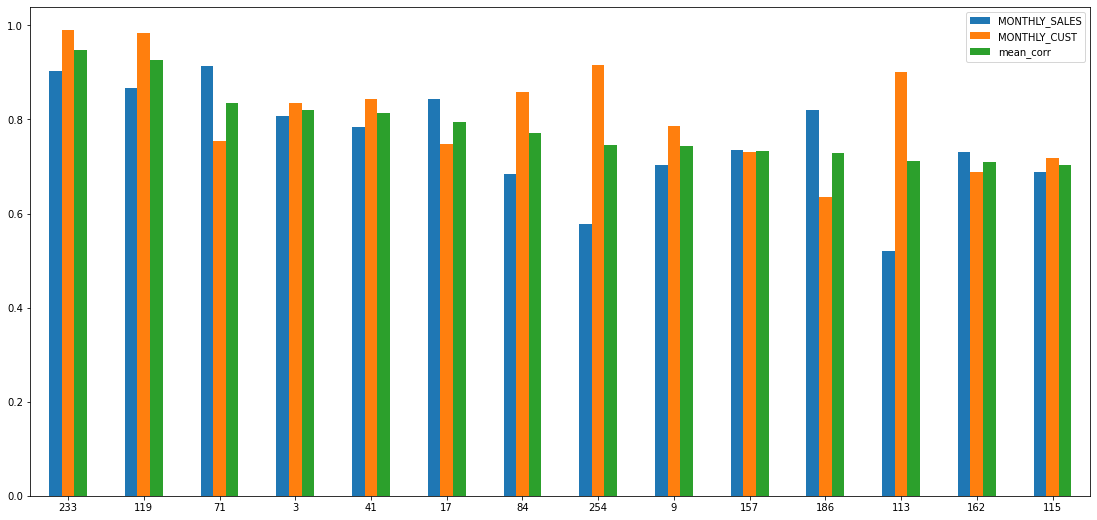

In [17]:
corr_77[corr_77['mean_corr'].abs()>0.7].plot(kind='bar',rot=0,figsize=(19,9))

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2018-07'),
  Text(1, 0, '2018-08'),
  Text(2, 0, '2018-09'),
  Text(3, 0, '2018-10'),
  Text(4, 0, '2018-11'),
  Text(5, 0, '2018-12'),
  Text(6, 0, '2019-01')])

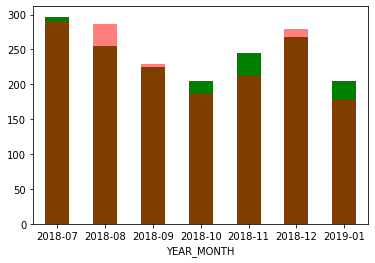

In [20]:
metrics_df.loc[77]['MONTHLY_SALES'].plot(kind = 'bar', color = 'g')
metrics_df.loc[233]['MONTHLY_SALES'].plot(kind = 'bar', color = 'r', alpha = 0.5)
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2018-07'),
  Text(1, 0, '2018-08'),
  Text(2, 0, '2018-09'),
  Text(3, 0, '2018-10'),
  Text(4, 0, '2018-11'),
  Text(5, 0, '2018-12'),
  Text(6, 0, '2019-01')])

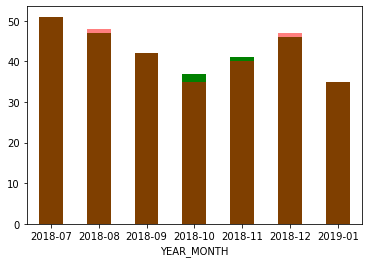

In [21]:
metrics_df.loc[77]['MONTHLY_CUST'].plot(kind = 'bar', color = 'g')
metrics_df.loc[233]['MONTHLY_CUST'].plot(kind = 'bar', color = 'r', alpha = 0.5)
plt.xticks(rotation=0)

In [ ]:
control_stores = transaction[(~transaction["STORE_NBR"].isin([77,86,88]))&(transaction["DATE"]<="2019-02-01")]
control_stores.head()

Let's first create the metrics of interest and filter to stores that are present 
throughout the pre-trial period.
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

In [ ]:
trial_stores.groupby(trial_stores['YEAR_MONTH'])['TOT_SALES'].sum()

In [ ]:
trial_stores.groupby(trial_stores['YEAR_MONTH'])['LYLTY_CARD_NBR'].count()

In [ ]:
trial_stores.groupby(['YEAR_MONTH','LYLTY_CARD_NBR'], as_index=False)['TOT_SALES'].count()

In [ ]:
transaction["YEAR_MONTH"] = pd.to_datetime(transaction['DATE']).dt.to_period('M')
transaction.head()

In [ ]:
store_num = transaction.groupby(transaction["STORE_NBR"])['YEAR_MONTH'].nunique()
